<a href="https://www.kaggle.com/code/codekalimi/evaluating-a-model-techniques?scriptVersionId=140317178" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-example/heart-disease.csv


# There are 3 main ways to evaluate a model prediction
1. Built in `score()` method
2. By **Scoring Parameters**
3. By `Metric` function

## 1. Let's evaluate a model with the `score()` method

In [2]:
heart_diseas_df = pd.read_csv("/kaggle/input/heart-disease-example/heart-disease.csv")
heart_diseas_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check the data before model fitting
heart_diseas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
len(heart_diseas_df)

303

In [5]:
# split into feature and target
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]

In [6]:
X.shape, y.shape

((303, 13), (303,))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Lets evaluate with score() method
rfc.score(X_test, y_test)

0.8688524590163934

### Let's try with regression problem

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# split into feature and target
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [15]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.81405465030518

# 2. Now Let's evaluate model using **`Scoring Parameters`**

In [17]:
from sklearn.model_selection import cross_val_score

# we'll use classification problem
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X, y)

array([0.80327869, 0.8852459 , 0.81967213, 0.85      , 0.76666667])

### So the first difference is `score()` method returns only single value while `cross_val_score()` method returns an array of values

In [18]:
# lets compare
rfc_score = rfc.score(X_test, y_test)
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y))
rfc_score, rfc_cross_val_score

(0.7213114754098361, 0.8248633879781421)

### let's see other classification model's evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

In [19]:
# 1. accuracy
rfc_cross_val_score = cross_val_score(rfc, X, y)
np.mean(rfc_cross_val_score)

0.8150273224043716

In [20]:
print(f"The Cross-val-score accuracy is: {np.mean(rfc_cross_val_score) * 100:.2f}%")

The Cross-val-score accuracy is: 81.50%


In [21]:
# AUC (ROC Curve)
# True positive => model predict 1 when truth is 1
# True negetive => model predict 0 when truth is 0
# False positive => model predict 1 when truth is 0
# False negetive => model predict 0 when truth is 1

In [22]:
from sklearn.metrics import roc_curve

# meke prediction with probabilites
y_probs = rfc.predict_proba(X_test)
y_probs[:10]

array([[0.15, 0.85],
       [0.65, 0.35],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.05, 0.95],
       [0.59, 0.41],
       [0.47, 0.53],
       [0.97, 0.03],
       [0.08, 0.92],
       [0.86, 0.14]])

In [23]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.85, 0.35, 0.  , 0.93, 0.95, 0.41, 0.53, 0.03, 0.92, 0.14])

In [24]:
# now calculte false positive rate(fpr), true positive rate(tpr) and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false poitive rate
fpr

array([0.     , 0.     , 0.     , 0.0625 , 0.0625 , 0.0625 , 0.09375,
       0.09375, 0.09375, 0.21875, 0.25   , 0.25   , 0.25   , 0.28125,
       0.34375, 0.34375, 0.4375 , 0.4375 , 0.46875, 0.46875, 0.5625 ,
       0.65625, 0.71875, 0.71875, 0.75   , 0.75   , 0.8125 , 0.875  ,
       0.90625, 1.     ])

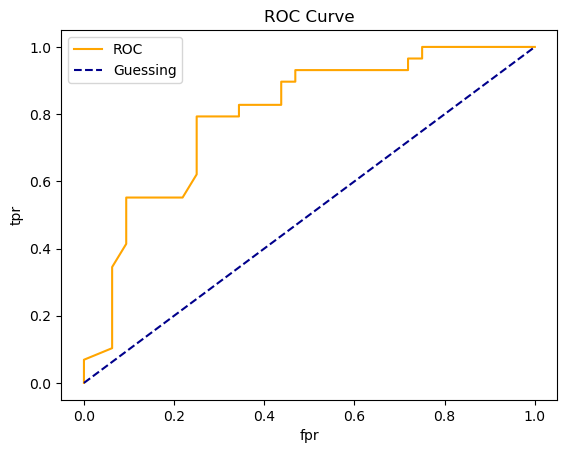

In [25]:
# create a function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_test, y_probs_positive)

0.7974137931034483

### Confusion metrics
A confusion matrix is a quick way to compare the lables a model predicts and the actual lables it was supposed to predict
In short, giving you an ida of where the model is getting confused

In [28]:
# take true labels and prediction
from sklearn.metrics import confusion_matrix
y_preds = rfc.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[21, 11],
       [ 6, 23]])

In [29]:
# visualize confusion matrix with crosstab(compare two different things)
pd.crosstab(y_test, y_preds, rownames=["Acutal Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Acutal Label,,
0,21,11
1,6,23


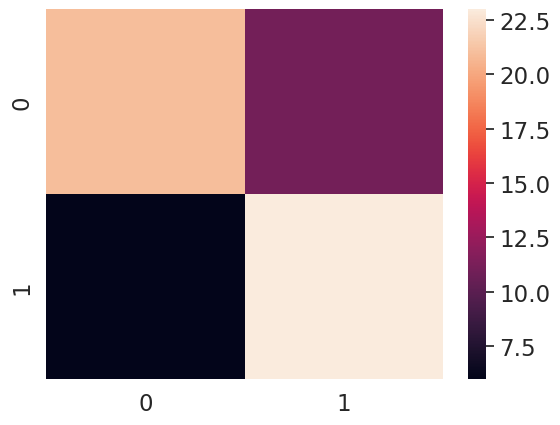

In [30]:
# Make our confusion matrix more with seaborn.heatmap
import seaborn as sns

sns.set(font_scale=1.5)

conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix);

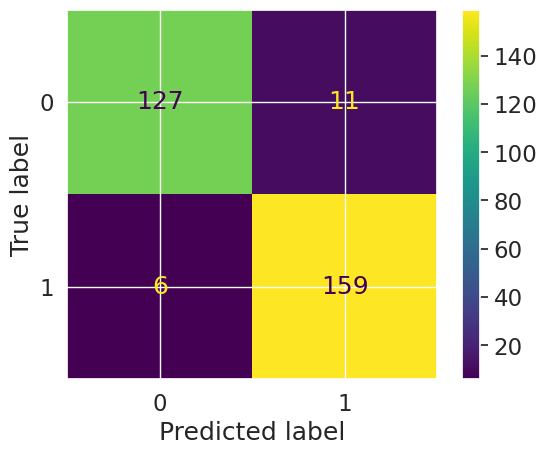

In [31]:
# confusino metrics using sklearn lates ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=X, y=y);

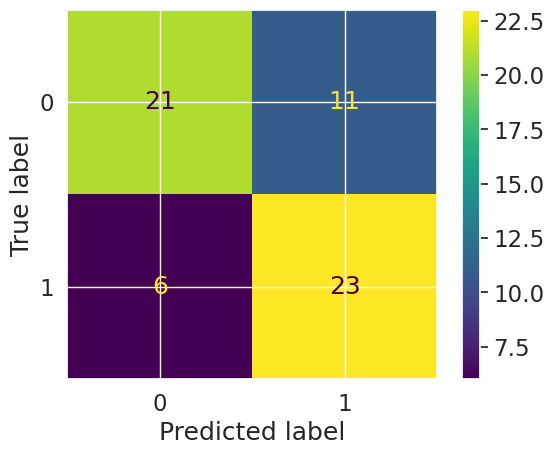

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

### From Classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.68      0.79      0.73        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



## Regression model evaluation metrics
1. R2-square
2. MAE
3. MSE

In [34]:
# split data from housing_df
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8112541110470264

In [37]:
y_pred = rfr.predict(X_test)
y_pred[:10]

array([1.01133  , 1.70296  , 1.96347  , 3.1246001, 3.5909417, 1.60022  ,
       3.6515223, 1.72688  , 1.7319703, 1.93929  ])

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8112541110470264

In [39]:
# MAE
from sklearn.metrics import mean_absolute_error
y_pred = rfr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.3293888351986436

In [40]:
y_pred[:10]

array([1.01133  , 1.70296  , 1.96347  , 3.1246001, 3.5909417, 1.60022  ,
       3.6515223, 1.72688  , 1.7319703, 1.93929  ])

In [41]:
np.array(y_test[:10])

array([0.904, 1.566, 1.845, 3.201, 3.617, 1.821, 1.909, 1.712, 1.375,
       1.78 ])

In [42]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.25149604843354134

## Evaluating model using `scoring` parameter 

what is happeing behind the model evaluatin is that - your prediction vs it should predict score

### for classification problem

In [43]:
X = heart_diseas_df.drop("target", axis=1)
y = heart_diseas_df["target"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
cv_rfc = cross_val_score(rfc, X, y)
cv_rfc.mean()

0.8249726775956285

In [47]:
cv_rfc_precision = cross_val_score(rfc, X, y, scoring="precision")
cv_rfc_precision.mean()

0.8264051147922116

In [48]:
cv_rfc_recall = cross_val_score(rfc, X, y, scoring="recall")
cv_rfc_recall.mean()

0.8606060606060606

### Regression

In [49]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
cv_rfr = cross_val_score(rfr, X, y)
cv_rfr.mean()

0.6514008158633695

In [52]:
# cv_rfr_precision = cross_val_score(rfr, X, y, scoring="mean_squared_error")
# cv_rfr_precision.mean()

In [53]:
from sklearn.metrics import get_scorer_names

In [54]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [55]:
cv_rfr_mae = cross_val_score(rfr, X, y, scoring="neg_mean_absolute_error")
cv_rfr_mae.mean()

-0.46610038733527137

## Evaluating model by `metric function`

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 5. Improving Model 

first prediction = baseline prediction.

first model = baseline model.

 From Data perspective of data
  1. Could we collect more data?
  2. Could we improve our data ? (Feature Engineering)
  
 From a Model perspective:
  1. Is there a better model could we use?
  2. Could we improve the current model? (Hyperparameter Tuning)
  
  Pattern we find often refers to Data Parameters
  Parameters = model finds these petterns in data
  Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability   to find patterns

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparameters
1. By Hand (we manually check different parameters, apply and test)
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

## 1. Hyperparameters tuning by Hand

 3 sets => training, validation, test

In [59]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [60]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
# shuffled the data
heart_diseas_shuffled = heart_diseas_df.sample(frac=1)
# heart_diseas_shuffled
# lets split data by hand into train, validation and test
X = heart_diseas_shuffled.drop("target", axis=1)
y = heart_diseas_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_diseas_df)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_diseas_df)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [62]:
len(heart_diseas_shuffled), len(X_train), len(X_valid), len(X_test)

(303, 212, 45, 46)

In [63]:
# lets fit model with default parameters
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# lets predict
y_pred = rfc.predict(X_valid)
evaluate_preds(y_valid, y_pred)

Acc: 80.00%
Precision: 0.67
Recall: 1.00
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.67, 'recall': 1.0, 'f1': 0.8}

In [64]:
rfc = RandomForestClassifier(min_samples_leaf=5)
rfc.fit(X_train, y_train)
# lets predict
y_pred = rfc.predict(X_valid)
evaluate_preds(y_valid, y_pred)

Acc: 84.44%
Precision: 0.72
Recall: 1.00
F1 score: 0.84


{'accuracy': 0.84, 'precision': 0.72, 'recall': 1.0, 'f1': 0.84}

### RandomizedSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000],
    "max_depth": [None, 5, 10, 20, 50, 100],
    "max_features": [None, "sqrt", "log2"],
    "min_samples_split": [2, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 5, 10]
}

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initate model
rfc = RandomForestClassifier()

# intiate RandomizedSearchCV
rscv_rfc = RandomizedSearchCV(estimator=rfc,
                             param_distributions=grid,
                             n_iter=50, # try 20 models total
                             cv=5, # 5-fold cross-validation
                             )

rscv_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 50, 100],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 4, 5, 10],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]})

In [66]:
rscv_rfc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 50}

In [67]:
y_pred = rscv_rfc.predict(X_test)
evaluate_preds(y_test, y_pred)

Acc: 80.33%
Precision: 0.79
Recall: 0.84
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.84, 'f1': 0.82}

### Using GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV
rscv_rfc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 50}

In [69]:
grid_2 = {
    "n_estimators": [ 400, 500, 600],
    "max_depth": [10, 20, 30],
    "max_features": ["log2"],
    "min_samples_split": [2],
    "min_samples_leaf": [4, 5]
}

In [70]:
# initate model
rfc = RandomForestClassifier()

# intiate GridSearchCV
gscv_rfc = GridSearchCV(estimator=rfc,
                        param_grid=grid_2,
                        cv=5, # 5-fold cross-validation
                        )

gscv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': ['log2'],
                         'min_samples_leaf': [4, 5], 'min_samples_split': [2],
                         'n_estimators': [400, 500, 600]})

In [71]:
gscv_rfc.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [72]:
gscv_pred = gscv_rfc.predict(X_test)
evaluate_preds(y_test, gscv_pred)

Acc: 80.33%
Precision: 0.79
Recall: 0.84
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.84, 'f1': 0.82}

# Don't forget to compare different metrics

#### Keep in mind, you can always improve baseline model

## FORWARD/BACKWARD feature analysis
FORWARD => Start with a single column(feature) then start adding column and check the score

BACKWARD => Start with all the column(feature) then start removing column and check the score

# Saving and loading trained machine learning model
Two ways to save:
1. `pickle` module
2. `joblib` module

In [73]:
import pickle

pickle.dump(gscv_rfc, open("gs_random_forest_model.pkl", "wb"))

In [74]:
loaded_pickle_model = pickle.load(open("/kaggle/working/gs_random_forest_model.pkl", "rb"))
pickle_model_pred = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_model_pred)

Acc: 80.33%
Precision: 0.79
Recall: 0.84
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.84, 'f1': 0.82}

In [75]:
from joblib import dump, load

dump(gscv_rfc, filename="gs_random_forest.joblib")

['gs_random_forest.joblib']

In [76]:
loaded_joblib_model = load(filename="/kaggle/working/gs_random_forest.joblib")
loaded_joblib_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': ['log2'],
                         'min_samples_leaf': [4, 5], 'min_samples_split': [2],
                         'n_estimators': [400, 500, 600]})

In [77]:
joblib_model_pred = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_model_pred)

Acc: 80.33%
Precision: 0.79
Recall: 0.84
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.79, 'recall': 0.84, 'f1': 0.82}